In [9]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [18]:
# Read data (FOR NOW GENERATE PSEUDO RANDOM NORMAL SEQUENCE)
xi = np.random.normal(size = (1, 10))

# Define number of distributions
K = xi.shape[0]

# Define number of atoms per sample
N = xi.shape[1]

# Define probability matrix
p = (1/N)*np.ones(N)

print(K, N)

1 10


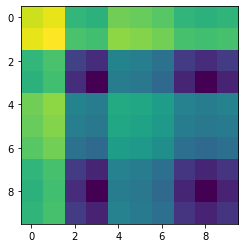

In [19]:
c = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        c[i,j] = np.sqrt( xi[0, i]**2 + xi[0, j]**2)
 
plt.imshow(c)

In [21]:
# Dec Var
T = cp.Variable((N, N))
epsilon = cp.Variable((1, 1))

# Obj
obj = cp.Minimize(epsilon)

# Cons
cons = [T >= 0]

cons.append(cp.trace(T@c) <= epsilon)
cons.append(T@np.ones(N) == p)
cons.append(T.T@np.ones(N) == p)

# Solve program
problem = cp.Problem(obj, cons)
problem.solve()

-inf

In [17]:
p

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])